In [30]:
import os
import pandas as pd
import tensorflow as tf
from keras.layers import Input
import numpy as np
import eli5
from eli5.sklearn import PermutationImportance
from keras.wrappers.scikit_learn import KerasRegressor

from keras.utils.data_utils import get_file

from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

from script_onelist_colab import norm_int,repair,csv_exp,sel_exp,maxima,import_raw,read_processed,read_processed_sel,correct,onelist,interpolate_mat,interpolation_spectra

def touch(fname):
    if os.path.exists(fname):
        os.utime(fname, None)
    else:
        os.mkdir(fname)


In [2]:
bev_feature=pd.read_pickle('PL_LT_beverage_onemat_pd_features.pkl')
onemat_feature=pd.read_pickle('PL_LT_augmented_onemat_pd_features.pkl')

In [3]:
bev_feature

,alcohol_concentration,beverage,blank_LT405,blank_LT450,blank_max,blank_max_ind,300_LT405,300_LT450,300_max,300_max_ind,150_LT405,150_LT450,150_max,150_max_ind,100_LT405,100_LT450,100_max,100_max_ind
0,0.000,bitburgerdrive,3.000000,3.000000,600,318,2.183124,2.111902,903,584,2.908449,2.153425,2185,586,3.045318,2.177614,5233,576
17,0.300,limoncello,1.515555,1.374942,17778,460,3.083160,3.067567,10843,576,3.111278,3.097759,20355,568,3.091673,3.015150,23628,566
11,0.520,luzhoulaojiao,4.007861,3.339557,3542,390,3.243899,3.372788,2910,572,3.353157,3.394990,7040,568,4.085580,3.413617,19277,558
4,0.130,whitewine2,3.601964,2.962862,-17047,548,2.176193,2.120685,1634,394,2.331251,2.188218,3519,460,2.921489,2.176003,4413,700
3,0.130,whitewine2,3.532181,2.943479,-17047,458,2.178319,2.178879,1634,654,2.231450,2.231797,3519,648,2.290667,2.176874,4413,648
10,0.520,luzhoulaojiao,3.378272,3.381989,3542,558,3.386943,3.285704,1669,580,3.346303,3.390359,11240,652,3.309076,4.060317,15157,566
1,0.000,bitburgerdrive,3.000000,3.000000,600,318,2.119272,2.674403,903,618,2.910669,2.651204,1632,578,2.165873,3.134769,2747,580
2,0.000,bitburgerdrive,3.000000,3.000000,600,318,2.114828,2.672636,903,394,2.137743,2.159349,2185,688,3.771043,3.157802,2747,326
16,0.048,bitburgerpils,3.757125,3.712942,-7934,384,2.299902,2.223183,1072,712,3.282514,2.283918,3299,720,2.639259,4.938661,8683,574
9,0.090,chimay,3.044881,3.003462,8067,558,2.323919,2.310716,600,318,2.325720,2.323901,1047,646,2.361803,2.353915,1117,650


In [4]:
onemat_feature

,alcohol_concentration,blank_LT405,blank_LT450,blank_max,blank_max_ind,300_LT405,300_LT450,300_max,300_max_ind,150_LT405,150_LT450,150_max,150_max_ind,100_LT405,100_LT450,100_max,100_max_ind
163,0.653333,0.831825,0.787450,2999.0,336,3.379921,3.368136,7528.0,588,3.604143,3.610551,16803.0,566,3.697795,3.672383,45916.0,556
550,0.266667,0.829233,0.788062,2999.0,336,2.667144,2.659470,5346.0,578,2.743283,2.747769,13686.0,574,2.918624,2.921027,29914.0,568
276,0.020000,0.829033,0.784945,2999.0,336,2.200916,2.116403,6292.0,584,2.075168,2.033228,10376.0,580,2.022267,2.029908,21146.0,576
355,0.386667,0.832241,0.787234,2999.0,336,3.030493,3.090662,5548.0,570,3.075343,3.089073,12320.0,574,3.249292,3.244816,33711.0,562
325,0.340000,0.831515,0.787821,2999.0,336,2.988414,2.967570,6039.0,576,3.024540,3.032890,12734.0,564,3.140390,3.151937,28285.0,566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,0.133333,0.833194,0.788276,2999.0,336,2.418299,2.426255,7001.0,584,2.497240,2.394184,13602.0,582,2.400293,2.404316,25592.0,574
342,0.366667,0.836680,0.785074,2999.0,336,3.024434,2.994712,5494.0,570,3.119901,3.148715,12600.0,568,3.218825,3.208882,27863.0,566
159,0.640000,0.834691,0.785365,2999.0,336,3.363087,3.353208,7110.0,588,3.589268,3.598338,16097.0,566,3.670951,3.668514,43421.0,558
362,0.900000,0.831754,0.784040,2999.0,336,3.647368,3.000000,7097.0,564,3.809634,3.855980,18597.0,556,3.874630,3.915710,37327.0,552


In [5]:
onemat_train = onemat_feature.sample(frac=0.8, random_state=0)
onemat_test = onemat_feature.drop(onemat_train.index)

In [6]:
onemat_train_val=onemat_train.copy()
onemat_test_val=onemat_test.copy()
onemat_train_val.drop(axis=1,columns=['blank_LT405','blank_LT450','blank_max_ind','blank_max'],inplace=True)
onemat_test_val.drop(axis=1,columns=['blank_LT405','blank_LT450','blank_max_ind','blank_max'],inplace=True)

onemat_train_lbl=onemat_train_val.pop('alcohol_concentration')*100
onemat_test_lbl=onemat_test_val.pop('alcohol_concentration')*100

In [7]:
bev_val=bev_feature.copy()
bev_val.drop(axis=1,columns=['blank_LT405','blank_LT450','blank_max_ind','blank_max','beverage'],inplace=True)
bev_lbl=bev_val.pop('alcohol_concentration')*100

In [8]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(onemat_train_val))


2022-03-14 13:15:32.724794: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [20]:
linear_model = tf.keras.Sequential([
    normalizer,
    Dense(units=1)
])
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [16]:
def build_linear(norm):
    linear_model = tf.keras.Sequential([
    normalizer,
    Dense(units=1)
    ])
    linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
    return linear_model


In [19]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/features_{epoch:02d}-{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [24]:
history = linear_model.fit(
    onemat_train_val,
    onemat_train_lbl,validation_data=(onemat_test_val, onemat_test_lbl),
    epochs=2000,
    # Suppress logging.
    verbose=1,callbacks=[model_checkpoint_callback]
    # Calculate validation results on 20% of the training data.
    )

Epoch 1/2000
15/15 [==============================] - 0s 14ms/step - loss: 56.3306 - val_loss: 57.4520
Epoch 2/2000
15/15 [==============================] - 0s 3ms/step - loss: 54.8897 - val_loss: 55.9069
Epoch 3/2000
15/15 [==============================] - 0s 1ms/step - loss: 53.3554 - val_loss: 54.3756
Epoch 4/2000
15/15 [==============================] - 0s 2ms/step - loss: 51.8464 - val_loss: 52.8833
Epoch 5/2000
15/15 [==============================] - 0s 1ms/step - loss: 50.3409 - val_loss: 51.3860
Epoch 6/2000
15/15 [==============================] - 0s 1ms/step - loss: 48.8492 - val_loss: 49.8831
Epoch 7/2000
15/15 [==============================] - 0s 1ms/step - loss: 47.3513 - val_loss: 48.3299
Epoch 8/2000
15/15 [==============================] - 0s 1ms/step - loss: 45.8544 - val_loss: 46.7584
Epoch 9/2000
15/15 [==============================] - 0s 1ms/step - loss: 44.3562 - val_loss: 45.2361
Epoch 10/2000
15/15 [==============================] - 0s 1ms/step - loss: 42.857

In [25]:
linear_model.load_weights('weights/features_182-4.10.hdf5')

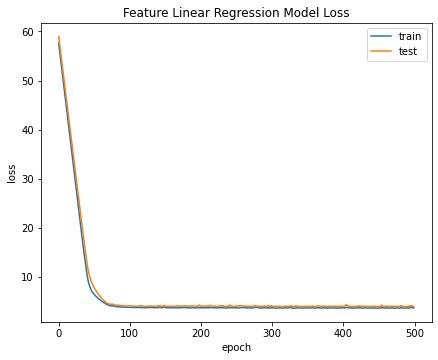

In [102]:
plt.figure(figsize=(7,5.5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot.set_facecolor('white')
plt.title('Feature Linear Regression Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.xlim(0,200)
#plt.yscale("log")
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('feature_linearreg_testset_training_500.png',facecolor='white',dpi=300)

In [39]:
build_model_override = lambda: build_linear(normalizer)
my_model = KerasRegressor(build_fn=build_model_override,epochs=500)    
my_model.fit(onemat_train_val,onemat_train_lbl)

perm = PermutationImportance(my_model, random_state=1).fit(onemat_train_val,onemat_train_lbl)
eli5.show_weights(perm, feature_names = onemat_train_val.columns.tolist())

/var/folders/59/bkkwn8jx1yjfssj2zs0hwv9w0000gn/T/ipykernel_85458/3824555965.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  my_model = KerasRegressor(build_fn=build_model_override,epochs=500)


Epoch 1/500
15/15 [==============================] - 0s 728us/step - loss: 57.8536
Epoch 2/500
15/15 [==============================] - 0s 397us/step - loss: 56.3346
Epoch 3/500
15/15 [==============================] - 0s 623us/step - loss: 54.8141
Epoch 4/500
15/15 [==============================] - 0s 463us/step - loss: 53.3144
Epoch 5/500
15/15 [==============================] - 0s 619us/step - loss: 51.8103
Epoch 6/500
15/15 [==============================] - 0s 499us/step - loss: 50.3403
Epoch 7/500
15/15 [==============================] - 0s 608us/step - loss: 48.8132
Epoch 8/500
15/15 [==============================] - 0s 533us/step - loss: 47.3083
Epoch 9/500
15/15 [==============================] - 0s 460us/step - loss: 45.8011
Epoch 10/500
15/15 [==============================] - 0s 652us/step - loss: 44.3099
Epoch 11/500
15/15 [==============================] - 0s 716us/step - loss: 42.8336
Epoch 12/500
15/15 [==============================] - 0s 978us/step - loss: 41.3136
E

Weight,Feature
17.0035 ± 1.3825,100_LT405
14.9733 ± 0.5130,150_LT450
13.1432 ± 0.8775,300_LT405
9.0692 ± 0.6606,150_LT405
2.9874 ± 0.2177,100_LT450
2.2223 ± 0.2771,150_max_ind
0.9405 ± 0.1826,300_LT450
0.6047 ± 0.0901,150_max
0.4699 ± 0.1061,300_max_ind
0.1931 ± 0.0703,100_max_ind


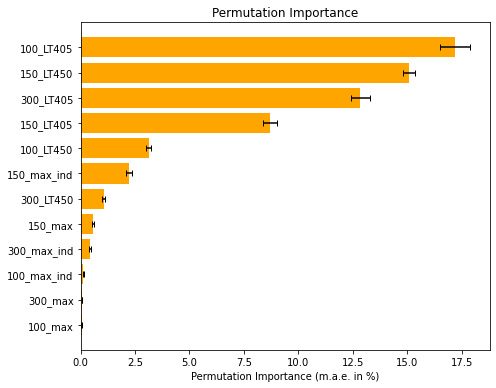

In [92]:
weight=eli5.explain_weights_df(perm, feature_names = onemat_train_val.columns.tolist())
x = range(len(weight)-1,-1,-1)
y = weight['weight'] #contains mean values in list
z = weight['std'] #contains std values in list
l=weight['feature'] #contains label names
plt.figure(figsize=(7,5.5))
rects = plt.barh(x, y, xerr=z, capsize=3, color='orange', label=l)
ax = plt.gca()
#ax.bar_label(rects)
ax.set_yticks(range(len(weight)-1,-1,-1),l)
ax.set_xlabel('Permutation Importance (m.a.e. in %)')
plt.title('Permutation Importance')
plt.tight_layout()
#plt.show()
plt.savefig('permutation_importance.png', dpi=300,facecolor='w')

In [13]:
pred=linear_model.predict(onemat_test_val)

In [95]:
len(pred)

116

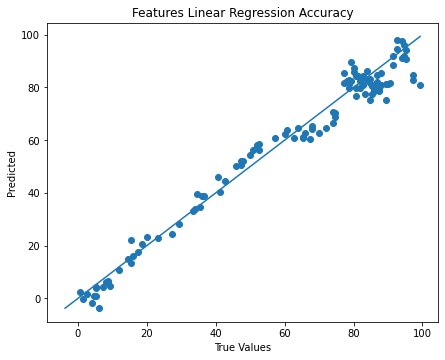

In [98]:
plt.figure(figsize=(7,5.5))

plt.scatter(onemat_test_lbl,pred)
# plt.plot(PL100obs['max_ind'], m*PL100obs['max_ind'] + b)
p1 = max(max(pred), max(onemat_test_lbl))
p2 = min(min(pred), min(onemat_test_lbl))
plt.plot([p1, p2], [p1, p2])#, 'b-')

plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title('Features Linear Regression Accuracy')
# plt.legend(['measured', 'fit (mae 7.6%)'], loc='upper right')
plt.savefig("Featurs_linearregression_accuracy.png",facecolor='white',dpi=300)

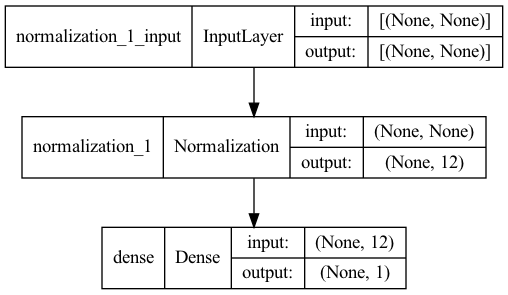

In [28]:
plot_model(linear_model, rankdir='TB',show_shapes=True,show_layer_names=True)

In [26]:
linear_model.evaluate(bev_val,bev_lbl)

1/1 [==============================] - 0s 18ms/step - loss: 41.8689


41.868892669677734

In [37]:
linear_model.save("linear_regression")

INFO:tensorflow:Assets written to: linear_regression/assets


2022-03-14 13:46:45.611388: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
